Bash commands to unzip the data for analysis

In [ ]:
!unzip '/content/digit-recognizer (1).zip'

Archive:  /content/digit-recognizer (1).zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Implementation using Sklearn

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report

Loading the Data and auditing the data

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Check the shape of data before transformation

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


Divide the data into X & Y

In [ ]:
X = train.iloc[:,1:]
Y = train['label']

Shape after transformation

In [ ]:
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


Split the data into train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


Implement Single Layer Perceptron. Evaluate performance and discuss reasons of failure

In [ ]:
per = Perceptron(verbose=2)
per.fit(x_train, y_train)
preds_per = per.predict(x_test)
cm_slp = confusion_matrix(y_test, preds_per)
clas_rep_slp = classification_report(y_test, preds_per)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.34 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.39 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 36264.55, NNZs: 571, Bias: -73.000000, T: 100800, Avg. loss: 21133.352976
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 38909.07, NNZs: 576, Bias: -84.000000, T: 134400, Avg. loss: 20576.478393
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 41697.16, NNZs: 578, Bias: -98.000000, T: 168000, Avg. loss: 19900.769613
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 44398.44, NNZs: 581, Bias: -105.000000, T: 201600, Avg. loss: 20754.749137
Total training time: 0.33 seconds.
-- Epoch 7
Norm: 46842.38, NNZs: 583, Bias: -118.000000, T: 235200, Avg. loss: 19517.157589
Total training time: 0.38 seconds.
-- Epoch 8
Norm: 49225.67, NNZs: 594, Bias: -128.000000, T: 268800, Avg. loss: 19386.208720
Total training time: 0.43 seconds.
-- Epoch 9
Norm: 51823.38, NNZs: 599, Bias: -137.000000, T: 302400, Avg. loss: 18184.694405
Total training time: 0.49 seconds.
-- Epoch 10
Norm: 54147.67, NNZs: 600, Bias: -143.000000, T: 336000, Avg. loss: 17881.692321
Total training time: 0.54 second

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.4s finished


In [ ]:
print(cm_slp)
print(clas_rep_slp)

[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78       817
           9       0.92     

In [ ]:
per.intercept_

array([-1061.,  -213., -1456., -1105.,  -876.,   861., -1550.,  -148.,
       -3996., -1616.])

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), verbose=1)
mlp.fit(x_train, y_train)
preds_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.84166010
Iteration 2, loss = 1.27654133
Iteration 3, loss = 0.92226668
Iteration 4, loss = 0.70655774
Iteration 5, loss = 0.61102950
Iteration 6, loss = 0.56050209
Iteration 7, loss = 0.51851176
Iteration 8, loss = 0.48998005
Iteration 9, loss = 0.46920501
Iteration 10, loss = 0.45193836
Iteration 11, loss = 0.43666676
Iteration 12, loss = 0.42070474
Iteration 13, loss = 0.41269348
Iteration 14, loss = 0.40284828
Iteration 15, loss = 0.40161350
Iteration 16, loss = 0.38859650
Iteration 17, loss = 0.38330472
Iteration 18, loss = 0.37323066
Iteration 19, loss = 0.36474867
Iteration 20, loss = 0.35917862
Iteration 21, loss = 0.35369540
Iteration 22, loss = 0.34894909
Iteration 23, loss = 0.34284512
Iteration 24, loss = 0.33570635
Iteration 25, loss = 0.33247927
Iteration 26, loss = 0.32558296
Iteration 27, loss = 0.31973129
Iteration 28, loss = 0.31929299
Iteration 29, loss = 0.32087040
Iteration 30, loss = 0.31019507
Iteration 31, loss = 0.30396803
Iteration 32, los

In [ ]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
clasrep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(clasrep_mlp)

[[755   0   6   1   0   1  12   1   8   1]
 [  0 910  12   2   2   6   3   1  12   1]
 [  6   6 757  15   7   1  18   4  21   3]
 [  1   3  38 711   0  43   0  15  18  29]
 [  2   1   1   0 743   3  10   6   2  28]
 [  9   4  12  23   3 711  12   0  18   8]
 [  8   0   4   0   6   8 830   1  13   0]
 [  5   7  13   3   7   1   0 793   6  25]
 [ 13  13   9  10   2  13  21  10 716  10]
 [  4   2   3   2  24  13   0  33  15 731]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       785
           1       0.96      0.96      0.96       949
           2       0.89      0.90      0.89       838
           3       0.93      0.83      0.88       858
           4       0.94      0.93      0.93       796
           5       0.89      0.89      0.89       800
           6       0.92      0.95      0.93       870
           7       0.92      0.92      0.92       860
           8       0.86      0.88      0.87       817
           9       0.87     

# Implementation Using Keras

Import all requisite libraries in keras to implement the model in Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Convert Y into one hot encode

In [ ]:
y_train_tc = to_categorical(y_train)
y_test_tc = to_categorical(y_test)

In [ ]:
print(y_train_tc.shape)
print(y_test_tc.shape)

(33600, 10)
(8400, 10)


In [ ]:
y_train_tc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Initialize the model and set up layers

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=(784)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_tc, validation_data=(x_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1050/1050 - 7s - loss: 2.2780 - accuracy: 0.7809 - val_loss: 0.3164 - val_accuracy: 0.9113 - 7s/epoch - 7ms/step
Epoch 2/100
1050/1050 - 6s - loss: 0.4168 - accuracy: 0.8870 - val_loss: 0.2415 - val_accuracy: 0.9367 - 6s/epoch - 6ms/step
Epoch 3/100
1050/1050 - 7s - loss: 0.3266 - accuracy: 0.9104 - val_loss: 0.2048 - val_accuracy: 0.9437 - 7s/epoch - 6ms/step
Epoch 4/100
1050/1050 - 6s - loss: 0.2830 - accuracy: 0.9222 - val_loss: 0.2054 - val_accuracy: 0.9490 - 6s/epoch - 6ms/step
Epoch 5/100
1050/1050 - 6s - loss: 0.2685 - accuracy: 0.9280 - val_loss: 0.2073 - val_accuracy: 0.9520 - 6s/epoch - 5ms/step
Epoch 6/100
1050/1050 - 6s - loss: 0.2653 - accuracy: 0.9310 - val_loss: 0.1900 - val_accuracy: 0.9523 - 6s/epoch - 5ms/step
Epoch 7/100
1050/1050 - 6s - loss: 0.2507 - accuracy: 0.9339 - val_loss: 0.2170 - val_accuracy: 0.9457 - 6s/epoch - 6ms/step
Epoch 8/100
1050/1050 - 6s - loss: 0.2416 - accuracy: 0.9377 - val_loss: 0.1872 - val_accuracy: 0.9593 - 6s/epoch - 6ms/step


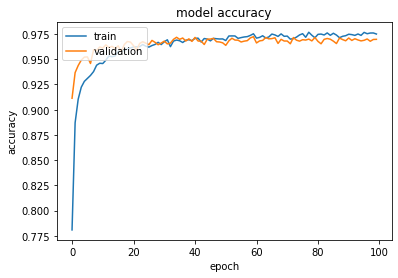

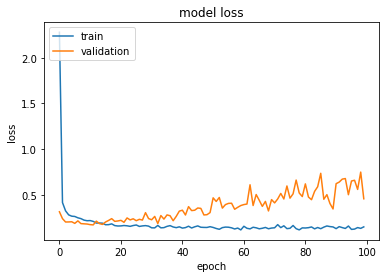

In [ ]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
preds_final = model.predict(test)

In [ ]:
preds_final_class = pd.DataFrame(np.argmax(preds_final, axis = 1))

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
sample_submission

In [ ]:
sample_submission['Label'] = preds_final_class

In [ ]:
sample_submission

In [ ]:
sample_submission.to_csv('Final_Submission.csv', index=False)

In [ ]:
sample_submission.describe()